Визуализация многомерных данных с помощью диаграмм Эндрюса: https://habrahabr.ru/post/248623/

EM алгоритм: https://msdn.microsoft.com/ru-ru/library/cc280445(v=sql.120).aspx ; http://www.math.spbu.ru/user/gran/courses/lecture_2_2.pdf ; http://algowiki-project.org/ru/%D0%A3%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D0%BA:Noite/EM-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#### Загрузка CSV

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Построить 2d график, с раскраской координат

{nan, 'S', 'Q', 'C'}


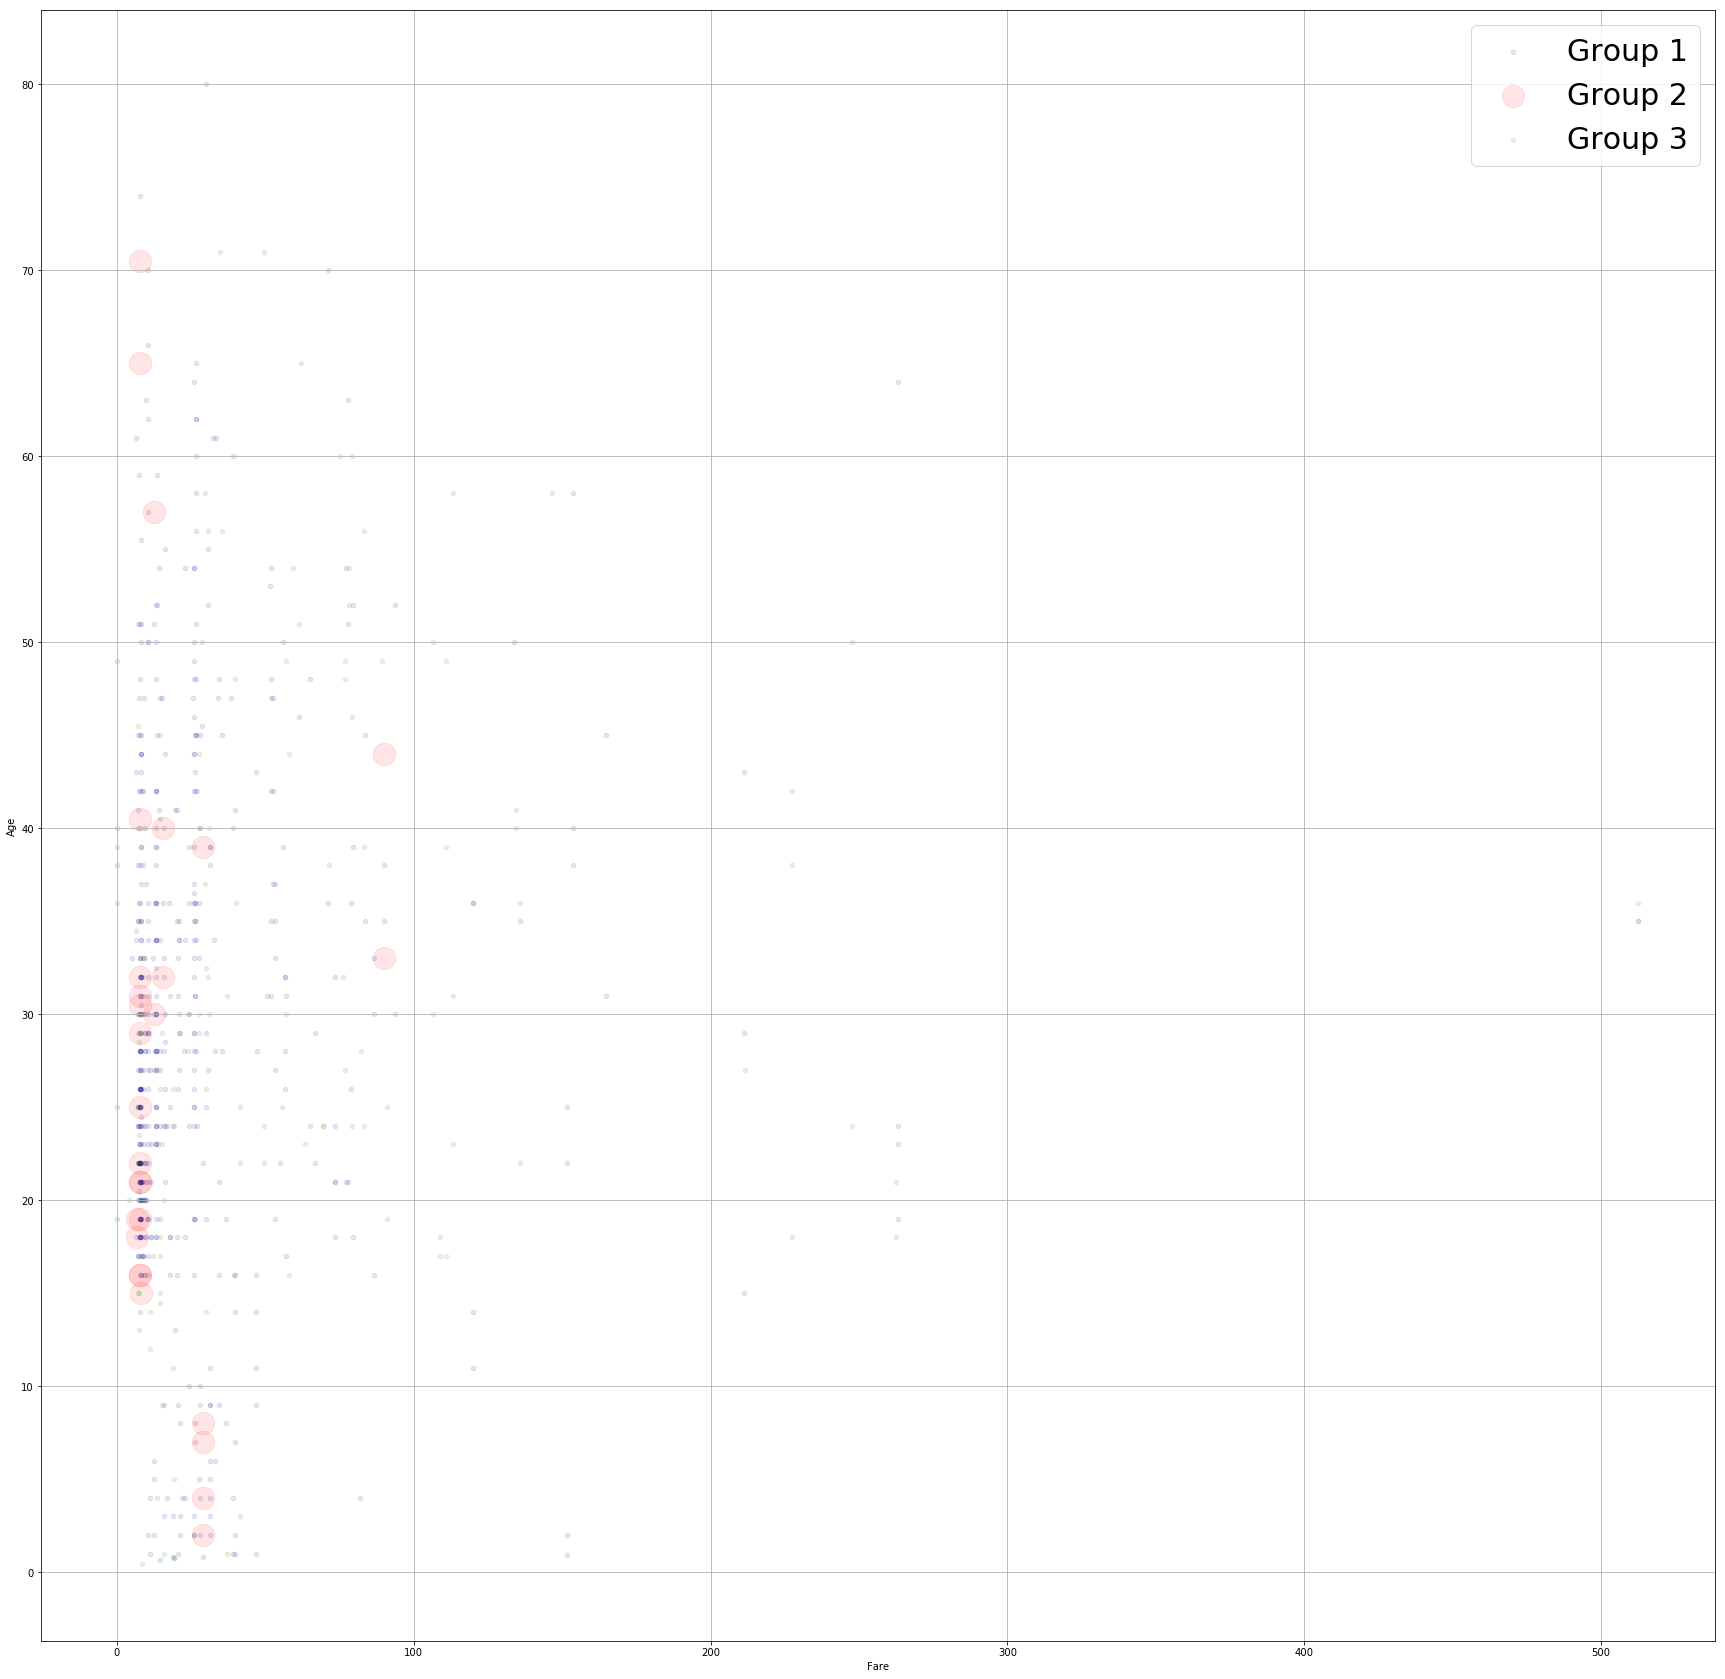

In [66]:
# Строим точки в координатах X - fare, Y - age, точки красим по embarked (бессмысленный, но показывает технику рисования)
print(set(train_df['Embarked'])) # nan, 'S', 'Q', 'C'

ax = train_df.loc[train_df['Embarked'] == 'S'].plot.scatter(figsize = (30, 30), x = 'Fare', y = 'Age', color='DarkBlue',\
                                                            alpha = 0.1, grid = True, label='Group 1')
bx = train_df.loc[train_df['Embarked'] == 'Q'].plot.scatter(figsize = (30, 30), x = 'Fare', y = 'Age', color='r',  alpha = 0.1, \
                                                            grid = True, label='Group 2', ax = ax, s = 500)
train_df.loc[train_df['Embarked'] == 'C'].plot.scatter(figsize = (30, 30), x = 'Fare', y = 'Age', color='g',  alpha = 0.1, \
                                                       grid = True, label='Group 3', ax = bx)

ax.legend(fontsize=30)

#### 123